### Solution Homework 4

### Exercise 1

Exercise 1.1:

If weak learners which are used in an ensemble method  are highly correlated this tends to result in relatively low performing models. Because ensemble methods such as bagging is built on weak learners that are able to distinguish different relations in the data. If the weak learners of such an ensemble model are highly correlated ,
all our bagged trees tend to to make the same splits because they all share the same features. This makes all these trees look very similar hence increasing correlation. When a new test dataset which is disimilar to trained dataset ,is tried predicting on built bagging models ,it performs weak prediction , because the built model has never seen new dataset and reduce the overall performance of ensemble method.


A lower correlation among ensemble model members will increase the error-correcting capability of the model. So it is preferred to use models with low correlations when creating ensembles

If all the trees as similar there is no point in performing random forest because all the bagged trees will look very similar, ie. similar to performing a single tree.Therefore, We have not addressed the original issue of variance. By decorrelating the trees and bagging we most effectively reduce the variance in our model.

When performing random forest if you set max_features = number of features in the dataset  you will be constructing a bagged decision tree model. If max_features < number of features  we will be performing Random forest.

To solve tree correlation we allow random forest to randomly choose only m  predictors(where m is subset of all features) in performing the split. Now the bagged trees all have different randomly selected features to perform cuts on. Therefore, the feature space is split on different predictors, decorrelating all the trees.



Exercise 1.2: 
Outliers can be bad for boosting because boosting builds each tree on previous trees' residuals/errors. Outliers will have much larger residuals than non-outliers, so  boosting will focus a disproportionate amount of its attention on those points.

Exercise 1.3:
    
Adaboost is more about voting weights while gradient boosting is more about adding some gradient optimization. The real difference lies in how they create the weak learners during the iterative process: AdaBoost changes the sample distribution by modifying the weights attached to each instance at each iteration. On the other hand, Gradient Boosting does not modify the sample distribution. Instead it trains on the remaining errors of the strong learner. So at each iteration a weak learner is fitted to the residuals of the errors of the strong learner (the so called pseudo residuals). Then a gradient descent optimization is used to compute the contribution of the weak learner to the strong one, to minimize the overall error of the final (strong) learner.}



### Exercise 2

In [1]:
# Exercise 2.1 import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

In [2]:
# import data
data = pd.read_csv("heart.csv")
data.head()



,Age,Sex,Chest pain type (category),Resting blood pressure,Cholesterol,Blood sugar,ECG results (category),Max. Heart rate,Exercise induced angina,Oldpeak,Slope (category),Vessels colored,Thal (category),Diagnosis
0,58,1,4,128,216,0,2,131,1,2.2,2,3,7,1
1,62,1,2,120,281,0,2,103,0,1.4,2,1,7,1
2,46,0,3,142,177,0,2,160,1,1.4,3,0,3,0
3,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
4,61,1,4,120,260,0,0,140,1,3.6,2,1,7,1


In [3]:
# preprocessing (apply any of imputation, scaling, feature selection, one hot encoding etc. as you feel necessary) 

#check if there are any missing values in the data 
data.isnull().sum()

#Prepare the data for testing and training set
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


# Splitting the data into 60% training, 20 % validation and 20% testing parts  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)




In [4]:

# Exercise 2.2

#Fit a Decision Tree on the training set to perform binary or multi-class classification
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=0)

##Build a decision tree classifier from the training set
dtree = dtree.fit(X_train, y_train)

#cross validate using validation set
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtree, X_valid, y_valid, cv=3)) 

[ 0.80952381  0.6         0.63157895]


/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


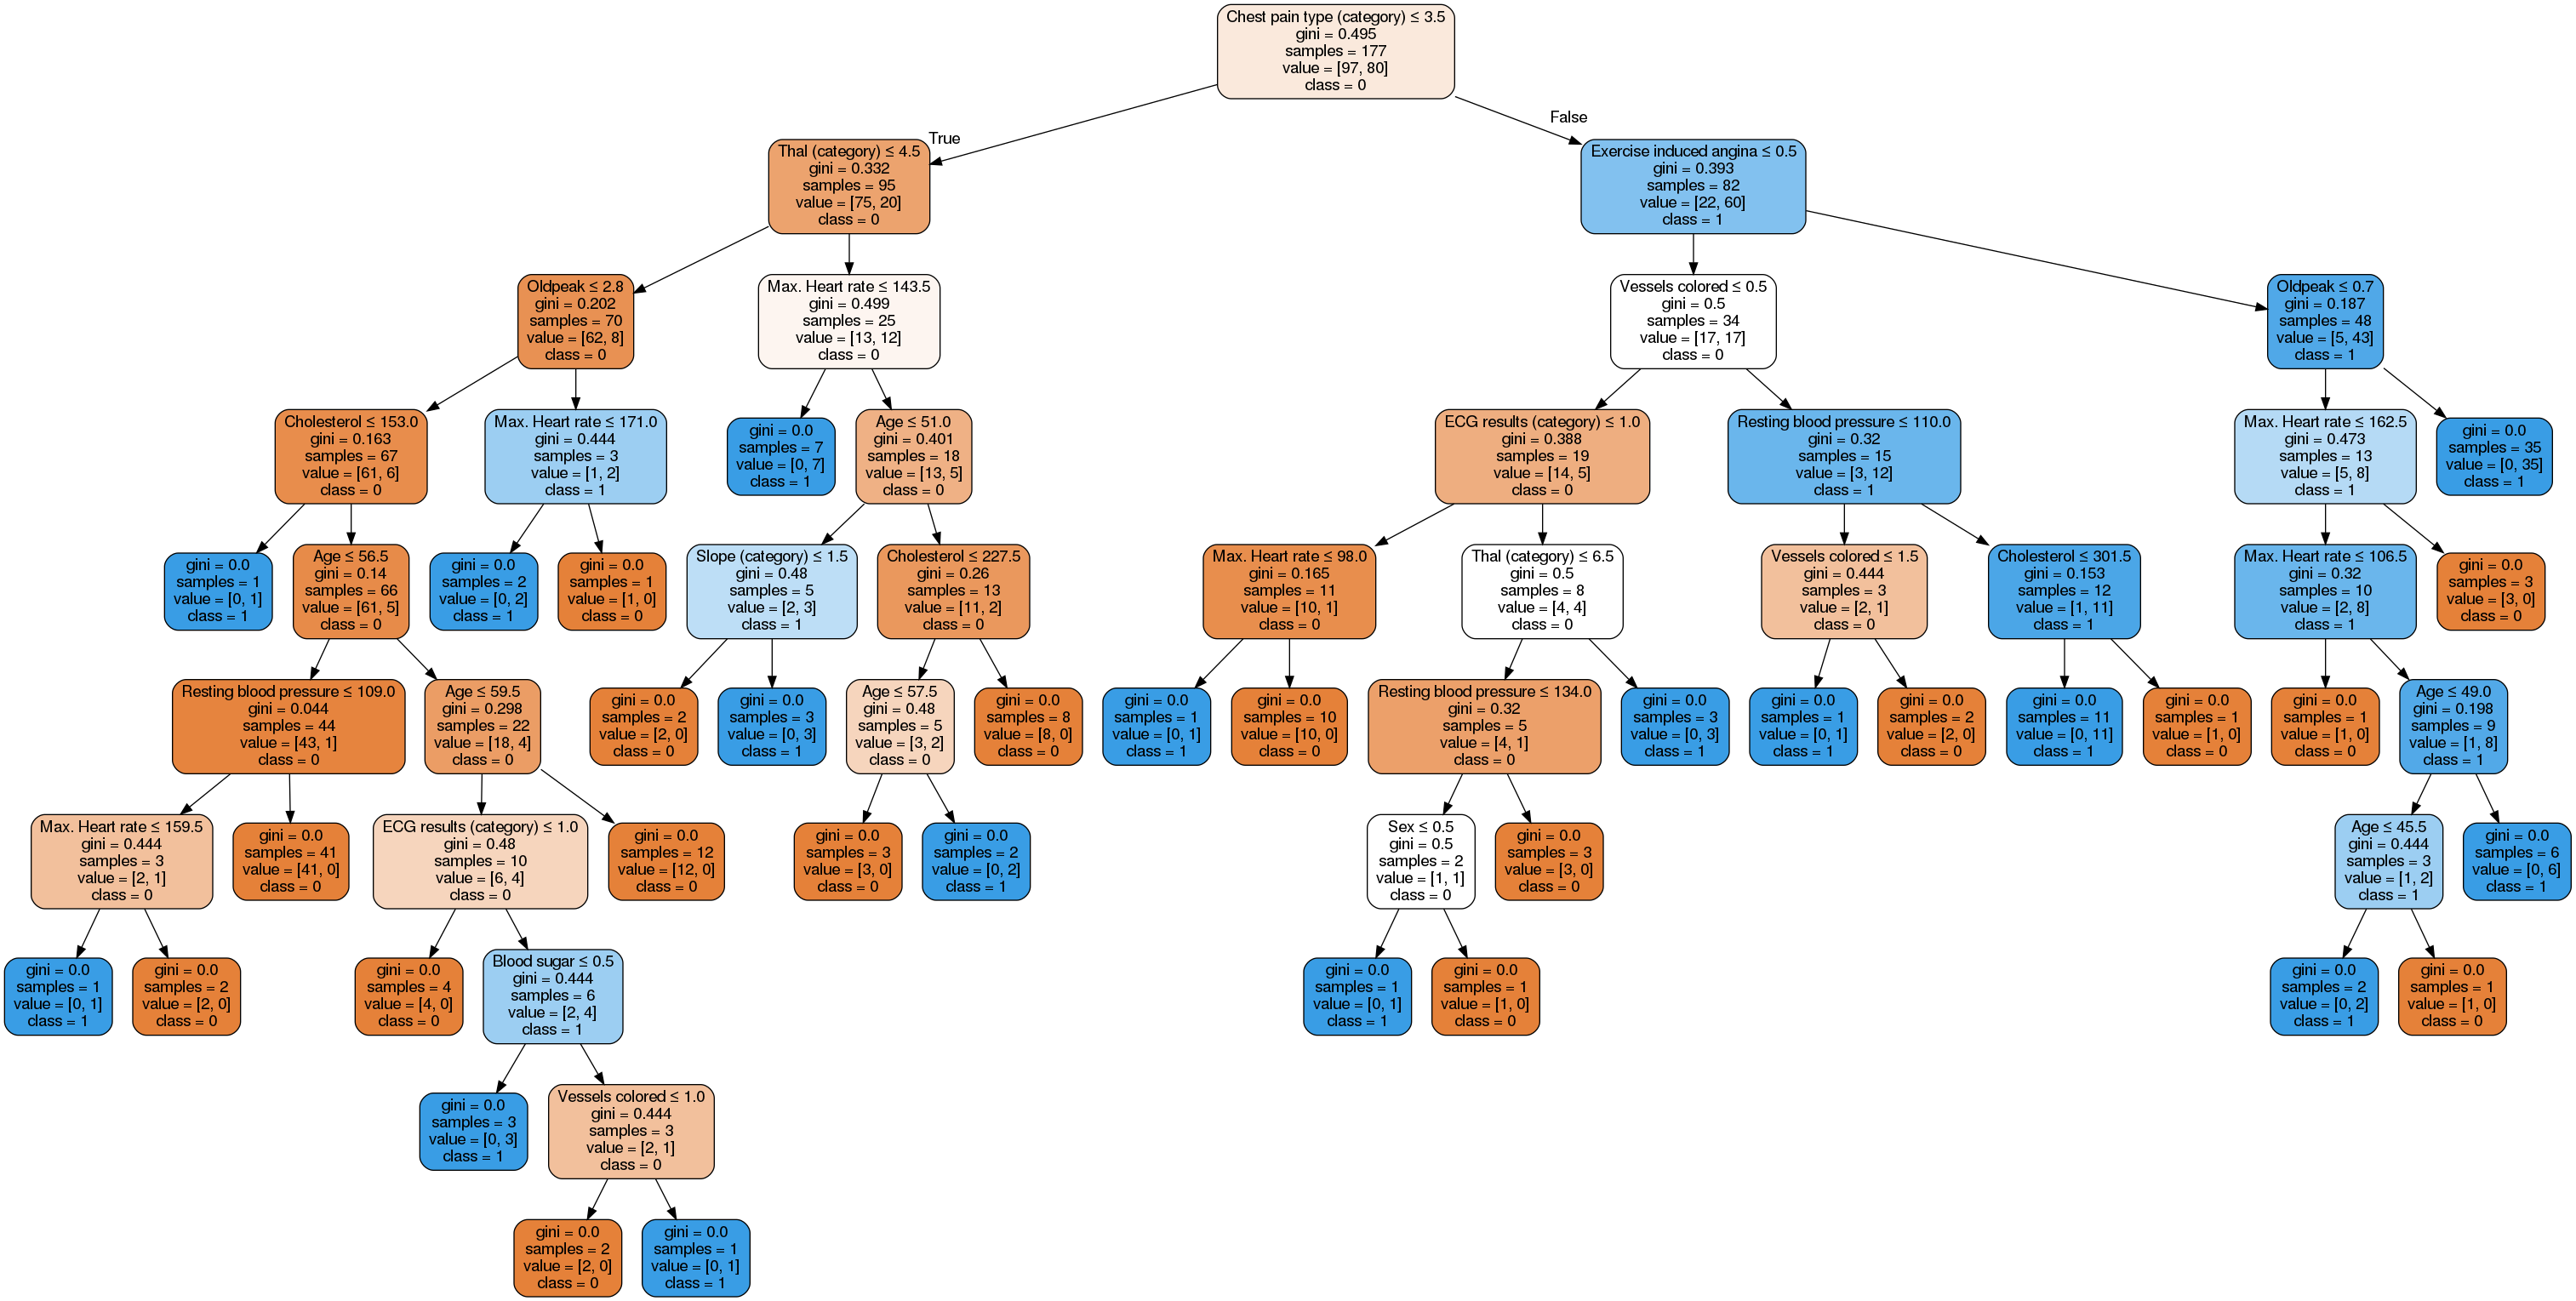

In [5]:
# Exercise 2.3

#Decision Tree Visualization using graphviz library

from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from subprocess import call

data_feature_names = data.columns[:-1]
#print(data_feature_names)

dot_data = StringIO()

export_graphviz(dtree,feature_names=data_feature_names, class_names = ['0','1'], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())





In [6]:
#decision tree.predict
y_valid_predict = dtree.predict(X_valid)

print('Feature importances:\n ')

for i in range(13):
    print(str(data.columns[i]) + ': ' + str(dtree.feature_importances_[i]))

Feature importances:
 
Age: 0.0924147952563
Sex: 0.0114046391753
Chest pain type (category): 0.272679750672
Resting blood pressure: 0.0325550609185
Cholesterol: 0.0513311132052
Blood sugar: 0.015206185567
ECG results (category): 0.0420098160114
Max. Heart rate: 0.16101861798
Exercise induced angina: 0.0711283237993
Oldpeak: 0.0537980697897
Slope (category): 0.0273711340206
Vessels colored: 0.0855147856755
Thal (category): 0.0835677079296


The most important features are  Chest pain type ,Max. Heart rate,Thal,Age . The output varies on implemnetation

#### Exercise 2.4 

Implementation available in  Ensemble_solution.py and it can be run or tested using main.py file or following code




In [7]:
# test implementation 
#from ensemble import BaggingClassifier_

from Ensemble_solution import BaggingClassifier_

clf = BaggingClassifier_(n_estimators=4)
clf.fit(X_train, y_train)
clf.predict(X_test)
print("\n Bagging Classifier prediction \n",clf.predict(X_test))



 Bagging Classifier prediction 
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.
  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.
  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.
  0.  1.  0.  0.  1.  0.]


###  Exercise 2.5  
##### Ensemble methods : Bagging, RandomForest and Boosting classifiers

In [8]:
# import sklearn Bagging, RandomForest and Boosting classifiers

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

bagging = BaggingClassifier()
forest = RandomForestClassifier()
boosting = GradientBoostingClassifier()



# fitting the classifiers and printing their score
# X_train, X_test, y_train, y_test
print('\033[1mAccuracy Scores:\n\033[0m')
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
# print('Bagging: ' + str(bagging.score(X_val, y_val)))
print("Bagging Accuracy:",metrics.accuracy_score(y_test, y_pred))

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('RandomForest Accuracy : ' , metrics.accuracy_score(y_test, y_pred))

boosting.fit(X_train, y_train)
y_pred = boosting.predict(X_test)
print('Gradient Boosting Accuracy: ' ,metrics.accuracy_score(y_test, y_pred))


Accuracy Scores:

Bagging Accuracy: 0.783333333333
RandomForest Accuracy :  0.8
Gradient Boosting Accuracy:  0.75


In [9]:
print('\033[1mComparison of Feature importances:\033[0m')
print('DecisionTree Classifier vs. GradientBoosting Classifier:\n')

for i in range(13):
    print('\033[1m' + str(data.columns[i]) + ': \033[0m' + str(dtree.feature_importances_[i]) + '  vs.  '
          + str(dtree.feature_importances_[i]))

Comparison of Feature importances:
DecisionTree Classifier vs. GradientBoosting Classifier:

Age: 0.0924147952563  vs.  0.0924147952563
Sex: 0.0114046391753  vs.  0.0114046391753
Chest pain type (category): 0.272679750672  vs.  0.272679750672
Resting blood pressure: 0.0325550609185  vs.  0.0325550609185
Cholesterol: 0.0513311132052  vs.  0.0513311132052
Blood sugar: 0.015206185567  vs.  0.015206185567
ECG results (category): 0.0420098160114  vs.  0.0420098160114
Max. Heart rate: 0.16101861798  vs.  0.16101861798
Exercise induced angina: 0.0711283237993  vs.  0.0711283237993
Oldpeak: 0.0537980697897  vs.  0.0537980697897
Slope (category): 0.0273711340206  vs.  0.0273711340206
Vessels colored: 0.0855147856755  vs.  0.0855147856755
Thal (category): 0.0835677079296  vs.  0.0835677079296



Exercise 2.6 :
The solution depends on implementation

"Chest pain type category" feature  have  approximately similar Feature importance as predicted from DecisionTree Classifier vs. GradientBoosting Classifier.

By comparing the other  feature importances you can see that many features get a similar importance, but never the same